# PCA ANALYSIS

In [3]:
import os 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Write Functions to generate PCA dataset (```generate_pca_data```) and do the pca on it (```do_pca```)

In [4]:
def generate_pca_data(file_path, column_name):
    
    os.chdir(file_path)
    
    filesDict = dict.fromkeys(os.listdir())
    
    for file in filesDict.keys():
        filesDict[file] = pd.read_csv(file)[["bins",column_name]]
        
    index_to_be = filesDict[list(filesDict.keys())[0]][["bins"]]
    merged_dict = dict.fromkeys(filesDict)
    
    for key in filesDict.keys():
        merged_dict[key] = index_to_be.merge(filesDict[key], 
                                      how = 'left', left_on = "bins", 
                                                    right_on = "bins").set_index("bins")[column_name]
    
    dataset = pd.DataFrame(merged_dict, index = index_to_be["bins"]).reset_index()
    
    return dataset

In [5]:
def do_pca(dataset):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(dataset)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    index_to_be = dataset[["bins"]]
    finalDf = pd.concat([principalDf, index_to_be[['bins']]], axis = 1)
    
    return finalDf

# 6KB INTERVALS

## 1. Generate data for Method A, B and C

In [6]:
datasetA = generate_pca_data("/Users/anushasubramanian/Desktop/Research/UCLA/Scoring Genotype by Region/Method A/6kb/(A) GT psl2%","GT psl2% (A)")
datasetA.head()

,bins,yi297_AATTGA.TCGCGTTTGACGGGG.csv,yi299_GTGCAG.ATCGCGTTGTTTCTC.csv,yi297_AATTGA.TCCTTGTGTTACTTA.csv,yi283_ACTTCG.CCATGGAATTAACCG.csv,yi283_ACGCGA.TACGATATAGAACTA.csv,yi299_GTGCAG.GTCAGTAGATGGTCA.csv,yi297_GGGCCG.TCGGCCTAGGGCGAG.csv,yi283_GGGTGC.CCATGGAAGTAATTT.csv,yi299_ACTTCG.GTTACGCGAGAGACT.csv,...,yi297_GGGTGC.TACGATATTGGAATT.csv,yi299_ACTTAA.CTTTCTCTTAGTCTA.csv,yi283_TAAAGA.ATCGCGTTCACTGTT.csv,yi283_GTCCTA.GAGTCTTTGCAGTAG.csv,yi299_TTCGAG.TCGGCCTAGCTATTA.csv,yi297_GGGTGC.GAGTCTTTTGGAATT.csv,yi283_GTCCTA.CCGCGCTTAGTAGCC.csv,yi299_TTCGAG.TGATATTGCGGAGAC.csv,yi283_CGCTTG.TCCTTGTGTCACAGC.csv,yi283_CGCTTG.TCGCGTTTCGGAGAC.csv
0,6000,0.000000,NaN,0.000000,NaN,0.0,0.0,NaN,100.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN
1,12000,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,18000,100.000000,100.0,25.000000,100.000000,0.0,NaN,0.0,100.000000,NaN,...,66.666667,100.000000,100.000000,83.333333,33.333333,100.000000,100.000000,NaN,NaN,0.000000
3,24000,65.909091,100.0,53.658537,0.000000,55.0,100.0,0.0,44.444444,42.857143,...,36.842105,66.666667,4.545455,36.000000,78.571429,39.285714,57.142857,0.0,10.0,65.217391
4,30000,23.076923,100.0,100.000000,33.333333,0.0,100.0,0.0,66.666667,NaN,...,60.000000,66.666667,0.000000,72.727273,57.142857,100.000000,0.000000,0.0,30.0,45.454545


In [7]:
datasetB = generate_pca_data("/Users/anushasubramanian/Desktop/Research/UCLA/Scoring Genotype by Region/Method B/6kb/(B) GT psl2%","GT avg psl2% (B)")
datasetB.head()

,bins,yi297_AATTGA.TCGCGTTTGACGGGG.csv,yi299_GTGCAG.ATCGCGTTGTTTCTC.csv,yi297_AATTGA.TCCTTGTGTTACTTA.csv,yi283_ACTTCG.CCATGGAATTAACCG.csv,yi283_ACGCGA.TACGATATAGAACTA.csv,yi299_GTGCAG.GTCAGTAGATGGTCA.csv,yi297_GGGCCG.TCGGCCTAGGGCGAG.csv,yi283_GGGTGC.CCATGGAAGTAATTT.csv,yi299_ACTTCG.GTTACGCGAGAGACT.csv,...,yi297_GGGTGC.TACGATATTGGAATT.csv,yi299_ACTTAA.CTTTCTCTTAGTCTA.csv,yi283_TAAAGA.ATCGCGTTCACTGTT.csv,yi283_GTCCTA.GAGTCTTTGCAGTAG.csv,yi299_TTCGAG.TCGGCCTAGCTATTA.csv,yi297_GGGTGC.GAGTCTTTTGGAATT.csv,yi283_GTCCTA.CCGCGCTTAGTAGCC.csv,yi299_TTCGAG.TGATATTGCGGAGAC.csv,yi283_CGCTTG.TCCTTGTGTCACAGC.csv,yi283_CGCTTG.TCGCGTTTCGGAGAC.csv
0,6000,0.000000,NaN,0.0,NaN,0.0,0.0,NaN,100.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
1,12000,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,18000,83.333333,100.0,25.0,100.000000,0.0,NaN,0.0,100.000000,NaN,...,66.666667,100.000000,100.000000,83.333333,33.333333,100.0,100.000000,NaN,NaN,0.000000
3,24000,55.681818,100.0,50.0,0.000000,45.0,100.0,0.0,44.444444,42.857143,...,34.210526,60.416667,4.545455,36.000000,78.571429,37.5,57.142857,0.0,5.0,63.043478
4,30000,23.076923,100.0,75.0,33.333333,0.0,100.0,0.0,66.666667,NaN,...,60.000000,66.666667,0.000000,72.727273,57.142857,100.0,0.000000,0.0,30.0,40.909091


In [8]:
datasetC = generate_pca_data("/Users/anushasubramanian/Desktop/Research/UCLA/Scoring Genotype by Region/Method C/6kb/(C) GT psl2%","GT avg psl2% (C)")
datasetC.head()

,bins,yi297_AATTGA.TCGCGTTTGACGGGG.csv,yi299_GTGCAG.ATCGCGTTGTTTCTC.csv,yi297_AATTGA.TCCTTGTGTTACTTA.csv,yi283_ACTTCG.CCATGGAATTAACCG.csv,yi283_ACGCGA.TACGATATAGAACTA.csv,yi299_GTGCAG.GTCAGTAGATGGTCA.csv,yi297_GGGCCG.TCGGCCTAGGGCGAG.csv,yi283_GGGTGC.CCATGGAAGTAATTT.csv,yi299_ACTTCG.GTTACGCGAGAGACT.csv,...,yi297_GGGTGC.TACGATATTGGAATT.csv,yi299_ACTTAA.CTTTCTCTTAGTCTA.csv,yi283_TAAAGA.ATCGCGTTCACTGTT.csv,yi283_GTCCTA.GAGTCTTTGCAGTAG.csv,yi299_TTCGAG.TCGGCCTAGCTATTA.csv,yi297_GGGTGC.GAGTCTTTTGGAATT.csv,yi283_GTCCTA.CCGCGCTTAGTAGCC.csv,yi299_TTCGAG.TGATATTGCGGAGAC.csv,yi283_CGCTTG.TCCTTGTGTCACAGC.csv,yi283_CGCTTG.TCGCGTTTCGGAGAC.csv
0,6000,0.000000,NaN,0.000000,NaN,0.000000,0.0,NaN,100.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN
1,12000,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,18000,83.333333,100.0,25.000000,100.000000,0.000000,NaN,0.0,93.809524,NaN,...,70.588235,100.000000,100.000000,83.333333,33.333333,100.000000,100.000000,NaN,NaN,0.000000
3,24000,57.575758,100.0,51.709975,0.000000,42.446429,100.0,0.0,44.444444,42.857143,...,33.137009,60.416667,4.545455,36.000000,78.571429,36.607143,57.142857,0.0,6.666667,63.684641
4,30000,23.076923,100.0,72.187500,33.333333,0.000000,100.0,0.0,66.666667,NaN,...,60.000000,66.666667,0.000000,72.727273,57.142857,100.000000,0.000000,0.0,30.000000,40.909091


## 2. Missing values

Currently going with filling it with 50%

In [9]:
datasetA = datasetA.fillna(50)
datasetA.head()

,bins,yi297_AATTGA.TCGCGTTTGACGGGG.csv,yi299_GTGCAG.ATCGCGTTGTTTCTC.csv,yi297_AATTGA.TCCTTGTGTTACTTA.csv,yi283_ACTTCG.CCATGGAATTAACCG.csv,yi283_ACGCGA.TACGATATAGAACTA.csv,yi299_GTGCAG.GTCAGTAGATGGTCA.csv,yi297_GGGCCG.TCGGCCTAGGGCGAG.csv,yi283_GGGTGC.CCATGGAAGTAATTT.csv,yi299_ACTTCG.GTTACGCGAGAGACT.csv,...,yi297_GGGTGC.TACGATATTGGAATT.csv,yi299_ACTTAA.CTTTCTCTTAGTCTA.csv,yi283_TAAAGA.ATCGCGTTCACTGTT.csv,yi283_GTCCTA.GAGTCTTTGCAGTAG.csv,yi299_TTCGAG.TCGGCCTAGCTATTA.csv,yi297_GGGTGC.GAGTCTTTTGGAATT.csv,yi283_GTCCTA.CCGCGCTTAGTAGCC.csv,yi299_TTCGAG.TGATATTGCGGAGAC.csv,yi283_CGCTTG.TCCTTGTGTCACAGC.csv,yi283_CGCTTG.TCGCGTTTCGGAGAC.csv
0,6000,0.000000,50.0,0.000000,50.000000,0.0,0.0,50.0,100.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,0.000000,50.000000,50.0,0.0,50.000000
1,12000,50.000000,100.0,50.000000,50.000000,50.0,50.0,50.0,50.000000,50.000000,...,50.000000,100.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0,0.000000
2,18000,100.000000,100.0,25.000000,100.000000,0.0,50.0,0.0,100.000000,50.000000,...,66.666667,100.000000,100.000000,83.333333,33.333333,100.000000,100.000000,50.0,50.0,0.000000
3,24000,65.909091,100.0,53.658537,0.000000,55.0,100.0,0.0,44.444444,42.857143,...,36.842105,66.666667,4.545455,36.000000,78.571429,39.285714,57.142857,0.0,10.0,65.217391
4,30000,23.076923,100.0,100.000000,33.333333,0.0,100.0,0.0,66.666667,50.000000,...,60.000000,66.666667,0.000000,72.727273,57.142857,100.000000,0.000000,0.0,30.0,45.454545


In [10]:
datasetB = datasetB.fillna(50)
datasetB.head()

,bins,yi297_AATTGA.TCGCGTTTGACGGGG.csv,yi299_GTGCAG.ATCGCGTTGTTTCTC.csv,yi297_AATTGA.TCCTTGTGTTACTTA.csv,yi283_ACTTCG.CCATGGAATTAACCG.csv,yi283_ACGCGA.TACGATATAGAACTA.csv,yi299_GTGCAG.GTCAGTAGATGGTCA.csv,yi297_GGGCCG.TCGGCCTAGGGCGAG.csv,yi283_GGGTGC.CCATGGAAGTAATTT.csv,yi299_ACTTCG.GTTACGCGAGAGACT.csv,...,yi297_GGGTGC.TACGATATTGGAATT.csv,yi299_ACTTAA.CTTTCTCTTAGTCTA.csv,yi283_TAAAGA.ATCGCGTTCACTGTT.csv,yi283_GTCCTA.GAGTCTTTGCAGTAG.csv,yi299_TTCGAG.TCGGCCTAGCTATTA.csv,yi297_GGGTGC.GAGTCTTTTGGAATT.csv,yi283_GTCCTA.CCGCGCTTAGTAGCC.csv,yi299_TTCGAG.TGATATTGCGGAGAC.csv,yi283_CGCTTG.TCCTTGTGTCACAGC.csv,yi283_CGCTTG.TCGCGTTTCGGAGAC.csv
0,6000,0.000000,50.0,0.0,50.000000,0.0,0.0,50.0,100.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,0.0,50.000000,50.0,0.0,50.000000
1,12000,50.000000,100.0,50.0,50.000000,50.0,50.0,50.0,50.000000,50.000000,...,50.000000,100.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.0,50.0,0.000000
2,18000,83.333333,100.0,25.0,100.000000,0.0,50.0,0.0,100.000000,50.000000,...,66.666667,100.000000,100.000000,83.333333,33.333333,100.0,100.000000,50.0,50.0,0.000000
3,24000,55.681818,100.0,50.0,0.000000,45.0,100.0,0.0,44.444444,42.857143,...,34.210526,60.416667,4.545455,36.000000,78.571429,37.5,57.142857,0.0,5.0,63.043478
4,30000,23.076923,100.0,75.0,33.333333,0.0,100.0,0.0,66.666667,50.000000,...,60.000000,66.666667,0.000000,72.727273,57.142857,100.0,0.000000,0.0,30.0,40.909091


In [11]:
datasetC = datasetC.fillna(50)
datasetC.head()

,bins,yi297_AATTGA.TCGCGTTTGACGGGG.csv,yi299_GTGCAG.ATCGCGTTGTTTCTC.csv,yi297_AATTGA.TCCTTGTGTTACTTA.csv,yi283_ACTTCG.CCATGGAATTAACCG.csv,yi283_ACGCGA.TACGATATAGAACTA.csv,yi299_GTGCAG.GTCAGTAGATGGTCA.csv,yi297_GGGCCG.TCGGCCTAGGGCGAG.csv,yi283_GGGTGC.CCATGGAAGTAATTT.csv,yi299_ACTTCG.GTTACGCGAGAGACT.csv,...,yi297_GGGTGC.TACGATATTGGAATT.csv,yi299_ACTTAA.CTTTCTCTTAGTCTA.csv,yi283_TAAAGA.ATCGCGTTCACTGTT.csv,yi283_GTCCTA.GAGTCTTTGCAGTAG.csv,yi299_TTCGAG.TCGGCCTAGCTATTA.csv,yi297_GGGTGC.GAGTCTTTTGGAATT.csv,yi283_GTCCTA.CCGCGCTTAGTAGCC.csv,yi299_TTCGAG.TGATATTGCGGAGAC.csv,yi283_CGCTTG.TCCTTGTGTCACAGC.csv,yi283_CGCTTG.TCGCGTTTCGGAGAC.csv
0,6000,0.000000,50.0,0.000000,50.000000,0.000000,0.0,50.0,100.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,0.000000,50.000000,50.0,0.000000,50.000000
1,12000,50.000000,100.0,50.000000,50.000000,50.000000,50.0,50.0,50.000000,50.000000,...,50.000000,100.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,0.000000
2,18000,83.333333,100.0,25.000000,100.000000,0.000000,50.0,0.0,93.809524,50.000000,...,70.588235,100.000000,100.000000,83.333333,33.333333,100.000000,100.000000,50.0,50.000000,0.000000
3,24000,57.575758,100.0,51.709975,0.000000,42.446429,100.0,0.0,44.444444,42.857143,...,33.137009,60.416667,4.545455,36.000000,78.571429,36.607143,57.142857,0.0,6.666667,63.684641
4,30000,23.076923,100.0,72.187500,33.333333,0.000000,100.0,0.0,66.666667,50.000000,...,60.000000,66.666667,0.000000,72.727273,57.142857,100.000000,0.000000,0.0,30.000000,40.909091


## 3. PCA

In [12]:
finalDf_A = do_pca(datasetA)
finalDf_A.head()

,principal component 1,principal component 2,bins
0,761999.974841,151.000978,6000
1,755999.649306,-162.674156,12000
2,750000.221512,401.431637,18000
3,744000.561037,904.925828,24000
4,738000.514956,801.846389,30000


In [13]:
finalDf_B = do_pca(datasetB)
finalDf_B.head()

,principal component 1,principal component 2,bins
0,761999.973397,135.158841,6000
1,755999.661082,-181.518220,12000
2,750000.215001,398.115322,18000
3,744000.562921,901.053227,24000
4,738000.511382,797.558859,30000


In [14]:
finalDf_C = do_pca(datasetC)
finalDf_C.head()

,principal component 1,principal component 2,bins
0,761999.974570,141.875034,6000
1,755999.660867,-180.563623,12000
2,750000.215348,398.911484,18000
3,744000.564334,901.511102,24000
4,738000.511327,798.655035,30000


## 4. Plot

If you want to set style then run this

In [19]:
# sns.set(rc={'figure.figsize':(10,7)})
# sns.set_style("whitegrid")

### SEPARATE PLOTS

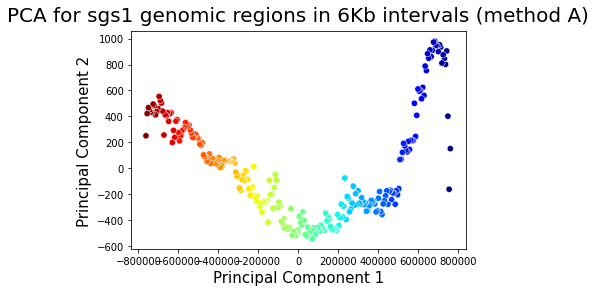

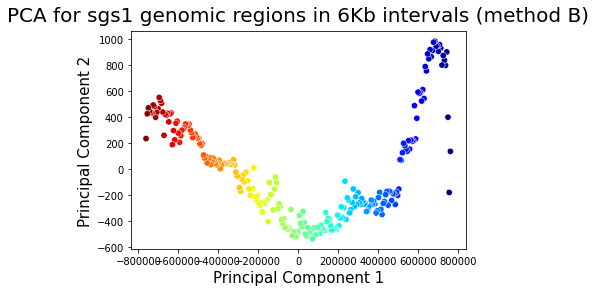

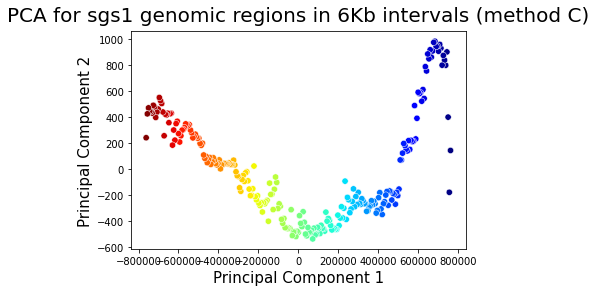

In [20]:
# METHOD A 
plt.figure()
cmap = plt.get_cmap('jet')
colors = list(cmap(np.linspace(0, 1, len(finalDf_A["bins"]))))
sns.scatterplot(x = "principal component 1", 
                y = "principal component 2",
                data = finalDf_A,
                palette = colors,
                s=40,
               hue = finalDf_A["bins"], legend = False)

#targets = list(finalDf_A["bins"]/1000)
#plt.legend(targets, bbox_to_anchor=(1, -0.15),ncol=11)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("PCA for sgs1 genomic regions in 6Kb intervals (method A)", fontsize = 20, pad = 10);



# METHOD B 
plt.figure()
cmap = plt.get_cmap('jet')
colors = list(cmap(np.linspace(0, 1, len(finalDf_B["bins"]))))
sns.scatterplot(x = "principal component 1", 
                y = "principal component 2",
                data = finalDf_B,
                palette = colors,
                s=40,
               hue = finalDf_B["bins"], legend = False)

#targets = list(finalDf_B["bins"]/1000)
#plt.legend(targets, bbox_to_anchor=(1, -0.15),ncol=11)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("PCA for sgs1 genomic regions in 6Kb intervals (method B)", fontsize = 20, pad = 10);



# METHOD C
plt.figure()
cmap = plt.get_cmap('jet')
colors = list(cmap(np.linspace(0, 1, len(finalDf_C["bins"]))))
sns.scatterplot(x = "principal component 1", 
                y = "principal component 2",
                data = finalDf_C,
                palette = colors,
                s=40,
               hue = finalDf_C["bins"], legend = False)

#targets = list(finalDf_C["bins"]/1000)
#plt.legend(targets, bbox_to_anchor=(1, -0.15),ncol=11)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("PCA for sgs1 genomic regions in 6Kb intervals (method C)", fontsize = 20, pad = 10);

### ON THE SAME PLOT

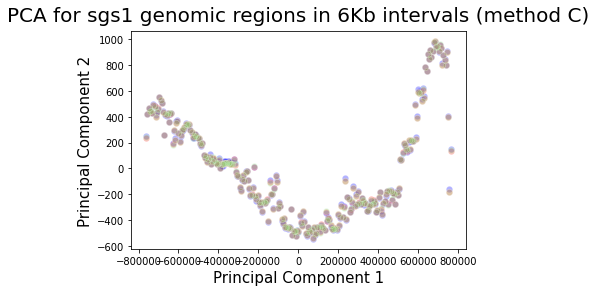

In [21]:
# METHOD A 
#plt.figure()
cmap = plt.get_cmap('jet')
colors = list(cmap(np.linspace(0, 1, len(finalDf_A["bins"]))))
sns.scatterplot(x = "principal component 1", 
                y = "principal component 2",
                data = finalDf_A,
                color = 'blue',
                s=40,
               legend = False, alpha = 0.3)

#targets = list(finalDf_A["bins"]/1000)
#plt.legend(targets, bbox_to_anchor=(1, -0.15),ncol=11)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("PCA for sgs1 genomic regions in 6Kb intervals (method A)", fontsize = 20, pad = 10);

# METHOD B 
#plt.figure()
cmap = plt.get_cmap('jet')
colors = list(cmap(np.linspace(0, 1, len(finalDf_B["bins"]))))
sns.scatterplot(x = "principal component 1", 
                y = "principal component 2",
                data = finalDf_B,
                color = 'red',
                s=40,
              legend = False, alpha = 0.3)

#targets = list(finalDf_B["bins"]/1000)
#plt.legend(targets, bbox_to_anchor=(1, -0.15),ncol=11)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("PCA for sgs1 genomic regions in 6Kb intervals (method B)", fontsize = 20, pad = 10);

# METHOD C
#plt.figure()
cmap = plt.get_cmap('jet')
colors = list(cmap(np.linspace(0, 1, len(finalDf_C["bins"]))))
sns.scatterplot(x = "principal component 1", 
                y = "principal component 2",
                data = finalDf_C,
                color = 'lightgreen',
                s=40,
               legend = False, alpha = 0.3)

#targets = list(finalDf_C["bins"]/1000)
#plt.legend(targets, bbox_to_anchor=(1, -0.15),ncol=11)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("PCA for sgs1 genomic regions in 6Kb intervals (method C)", fontsize = 20, pad = 10);

# 15 KB INTERVALS

## 1. Generate data for Method A, B and C

In [22]:
datasetA = generate_pca_data("/Users/anushasubramanian/Desktop/Research/UCLA/Scoring Genotype by Region/Method A/15kb/(A) GT psl2%","GT psl2% (A)")
datasetA.head()

,bins,yi297_AATTGA.TCGCGTTTGACGGGG.csv,yi299_GTGCAG.ATCGCGTTGTTTCTC.csv,yi297_AATTGA.TCCTTGTGTTACTTA.csv,yi283_ACTTCG.CCATGGAATTAACCG.csv,yi283_ACGCGA.TACGATATAGAACTA.csv,yi299_GTGCAG.GTCAGTAGATGGTCA.csv,yi297_GGGCCG.TCGGCCTAGGGCGAG.csv,yi283_GGGTGC.CCATGGAAGTAATTT.csv,yi299_ACTTCG.GTTACGCGAGAGACT.csv,...,yi297_GGGTGC.TACGATATTGGAATT.csv,yi299_ACTTAA.CTTTCTCTTAGTCTA.csv,yi283_TAAAGA.ATCGCGTTCACTGTT.csv,yi283_GTCCTA.GAGTCTTTGCAGTAG.csv,yi299_TTCGAG.TCGGCCTAGCTATTA.csv,yi297_GGGTGC.GAGTCTTTTGGAATT.csv,yi283_GTCCTA.CCGCGCTTAGTAGCC.csv,yi299_TTCGAG.TGATATTGCGGAGAC.csv,yi283_CGCTTG.TCCTTGTGTCACAGC.csv,yi283_CGCTTG.TCGCGTTTCGGAGAC.csv
0,15000,0.000000,100.000000,50.000000,100.000000,0.000000,0.000000,NaN,100.000000,NaN,...,0.000000,100.000000,100.000000,50.000000,100.000000,50.000000,100.000000,NaN,0.0,0.000000
1,30000,60.317460,100.000000,57.692308,12.000000,47.826087,100.000000,0.0,55.263158,42.857143,...,46.153846,72.093023,4.166667,52.500000,65.217391,41.379310,50.000000,0.0,20.0,61.403509
2,45000,48.837209,75.000000,47.368421,0.000000,46.666667,28.571429,0.0,90.476190,NaN,...,52.173913,65.217391,0.000000,63.636364,60.000000,6.896552,50.000000,0.0,0.0,60.000000
3,60000,70.967742,100.000000,90.909091,28.571429,35.714286,14.285714,0.0,57.142857,40.000000,...,40.000000,40.000000,12.500000,52.941176,100.000000,20.588235,85.714286,0.0,0.0,92.307692
4,75000,70.000000,28.571429,30.000000,55.555556,25.000000,40.000000,0.0,32.258065,28.571429,...,37.037037,63.157895,0.000000,63.636364,41.176471,13.157895,100.000000,0.0,0.0,70.000000


In [23]:
datasetB = generate_pca_data("/Users/anushasubramanian/Desktop/Research/UCLA/Scoring Genotype by Region/Method B/15kb/(B) GT psl2%","GT avg psl2% (B)")
datasetB.head()

,bins,yi297_AATTGA.TCGCGTTTGACGGGG.csv,yi299_GTGCAG.ATCGCGTTGTTTCTC.csv,yi297_AATTGA.TCCTTGTGTTACTTA.csv,yi283_ACTTCG.CCATGGAATTAACCG.csv,yi283_ACGCGA.TACGATATAGAACTA.csv,yi299_GTGCAG.GTCAGTAGATGGTCA.csv,yi297_GGGCCG.TCGGCCTAGGGCGAG.csv,yi283_GGGTGC.CCATGGAAGTAATTT.csv,yi299_ACTTCG.GTTACGCGAGAGACT.csv,...,yi297_GGGTGC.TACGATATTGGAATT.csv,yi299_ACTTAA.CTTTCTCTTAGTCTA.csv,yi283_TAAAGA.ATCGCGTTCACTGTT.csv,yi283_GTCCTA.GAGTCTTTGCAGTAG.csv,yi299_TTCGAG.TCGGCCTAGCTATTA.csv,yi297_GGGTGC.GAGTCTTTTGGAATT.csv,yi283_GTCCTA.CCGCGCTTAGTAGCC.csv,yi299_TTCGAG.TGATATTGCGGAGAC.csv,yi283_CGCTTG.TCCTTGTGTCACAGC.csv,yi283_CGCTTG.TCGCGTTTCGGAGAC.csv
0,15000,0.000000,100.000000,50.000000,100.000000,0.000000,0.000000,NaN,100.000000,NaN,...,0.000000,100.000000,100.000000,50.000000,100.000000,50.000000,100.000000,NaN,0.0,0.000000
1,30000,51.587302,100.000000,50.961538,12.000000,39.130435,100.000000,0.0,55.263158,42.857143,...,44.230769,68.604651,4.166667,52.500000,65.217391,39.655172,50.000000,0.0,17.5,58.771930
2,45000,44.186047,75.000000,39.473684,0.000000,43.333333,28.571429,0.0,85.714286,NaN,...,47.826087,60.869565,0.000000,63.636364,60.000000,3.448276,50.000000,0.0,0.0,57.500000
3,60000,67.741935,100.000000,90.909091,28.571429,32.142857,14.285714,0.0,50.000000,40.000000,...,36.666667,36.666667,12.500000,47.058824,100.000000,20.588235,85.714286,0.0,0.0,86.538462
4,75000,62.000000,21.428571,28.333333,55.555556,22.916667,40.000000,0.0,30.645161,28.571429,...,37.037037,51.315789,0.000000,60.227273,41.176471,10.526316,100.000000,0.0,0.0,65.000000


In [24]:
datasetC = generate_pca_data("/Users/anushasubramanian/Desktop/Research/UCLA/Scoring Genotype by Region/Method C/15kb/(C) GT psl2%","GT avg psl2% (C)")
datasetC.head()

,bins,yi297_AATTGA.TCGCGTTTGACGGGG.csv,yi299_GTGCAG.ATCGCGTTGTTTCTC.csv,yi297_AATTGA.TCCTTGTGTTACTTA.csv,yi283_ACTTCG.CCATGGAATTAACCG.csv,yi283_ACGCGA.TACGATATAGAACTA.csv,yi299_GTGCAG.GTCAGTAGATGGTCA.csv,yi297_GGGCCG.TCGGCCTAGGGCGAG.csv,yi283_GGGTGC.CCATGGAAGTAATTT.csv,yi299_ACTTCG.GTTACGCGAGAGACT.csv,...,yi297_GGGTGC.TACGATATTGGAATT.csv,yi299_ACTTAA.CTTTCTCTTAGTCTA.csv,yi283_TAAAGA.ATCGCGTTCACTGTT.csv,yi283_GTCCTA.GAGTCTTTGCAGTAG.csv,yi299_TTCGAG.TCGGCCTAGCTATTA.csv,yi297_GGGTGC.GAGTCTTTTGGAATT.csv,yi283_GTCCTA.CCGCGCTTAGTAGCC.csv,yi299_TTCGAG.TGATATTGCGGAGAC.csv,yi283_CGCTTG.TCCTTGTGTCACAGC.csv,yi283_CGCTTG.TCGCGTTTCGGAGAC.csv
0,15000,0.000000,100.000000,50.000000,100.000000,0.000000,0.000000,NaN,100.000000,NaN,...,11.764706,100.000000,100.000000,50.000000,100.000000,50.000000,100.000000,NaN,0.000000,0.000000
1,30000,52.910053,100.000000,51.877096,12.000000,36.909938,100.000000,0.0,54.448622,42.857143,...,43.446276,68.604651,4.166667,52.500000,65.217391,38.793103,50.000000,0.0,18.333333,59.289359
2,45000,43.604651,75.000000,36.181759,0.000000,43.333333,28.571429,0.0,86.349206,NaN,...,48.913043,60.144928,0.000000,63.636364,60.000000,3.201970,50.000000,0.0,0.000000,57.500000
3,60000,67.018689,100.000000,90.909091,28.571429,33.333333,14.285714,0.0,50.000000,40.000000,...,38.095238,36.111111,12.500000,45.588235,100.000000,20.359477,85.714286,0.0,0.000000,86.355311
4,75000,63.554812,21.428571,28.333333,55.555556,23.611111,40.000000,0.0,30.645161,28.571429,...,37.037037,50.451128,0.000000,59.393939,41.176471,10.098776,100.000000,0.0,0.000000,64.722222


## 2. Missing values

Currently going with filling it with 50%

In [25]:
datasetA = datasetA.fillna(50)
datasetA.head()

,bins,yi297_AATTGA.TCGCGTTTGACGGGG.csv,yi299_GTGCAG.ATCGCGTTGTTTCTC.csv,yi297_AATTGA.TCCTTGTGTTACTTA.csv,yi283_ACTTCG.CCATGGAATTAACCG.csv,yi283_ACGCGA.TACGATATAGAACTA.csv,yi299_GTGCAG.GTCAGTAGATGGTCA.csv,yi297_GGGCCG.TCGGCCTAGGGCGAG.csv,yi283_GGGTGC.CCATGGAAGTAATTT.csv,yi299_ACTTCG.GTTACGCGAGAGACT.csv,...,yi297_GGGTGC.TACGATATTGGAATT.csv,yi299_ACTTAA.CTTTCTCTTAGTCTA.csv,yi283_TAAAGA.ATCGCGTTCACTGTT.csv,yi283_GTCCTA.GAGTCTTTGCAGTAG.csv,yi299_TTCGAG.TCGGCCTAGCTATTA.csv,yi297_GGGTGC.GAGTCTTTTGGAATT.csv,yi283_GTCCTA.CCGCGCTTAGTAGCC.csv,yi299_TTCGAG.TGATATTGCGGAGAC.csv,yi283_CGCTTG.TCCTTGTGTCACAGC.csv,yi283_CGCTTG.TCGCGTTTCGGAGAC.csv
0,15000,0.000000,100.000000,50.000000,100.000000,0.000000,0.000000,50.0,100.000000,50.000000,...,0.000000,100.000000,100.000000,50.000000,100.000000,50.000000,100.000000,50.0,0.0,0.000000
1,30000,60.317460,100.000000,57.692308,12.000000,47.826087,100.000000,0.0,55.263158,42.857143,...,46.153846,72.093023,4.166667,52.500000,65.217391,41.379310,50.000000,0.0,20.0,61.403509
2,45000,48.837209,75.000000,47.368421,0.000000,46.666667,28.571429,0.0,90.476190,50.000000,...,52.173913,65.217391,0.000000,63.636364,60.000000,6.896552,50.000000,0.0,0.0,60.000000
3,60000,70.967742,100.000000,90.909091,28.571429,35.714286,14.285714,0.0,57.142857,40.000000,...,40.000000,40.000000,12.500000,52.941176,100.000000,20.588235,85.714286,0.0,0.0,92.307692
4,75000,70.000000,28.571429,30.000000,55.555556,25.000000,40.000000,0.0,32.258065,28.571429,...,37.037037,63.157895,0.000000,63.636364,41.176471,13.157895,100.000000,0.0,0.0,70.000000


In [26]:
datasetB = datasetB.fillna(50)
datasetB.head()

,bins,yi297_AATTGA.TCGCGTTTGACGGGG.csv,yi299_GTGCAG.ATCGCGTTGTTTCTC.csv,yi297_AATTGA.TCCTTGTGTTACTTA.csv,yi283_ACTTCG.CCATGGAATTAACCG.csv,yi283_ACGCGA.TACGATATAGAACTA.csv,yi299_GTGCAG.GTCAGTAGATGGTCA.csv,yi297_GGGCCG.TCGGCCTAGGGCGAG.csv,yi283_GGGTGC.CCATGGAAGTAATTT.csv,yi299_ACTTCG.GTTACGCGAGAGACT.csv,...,yi297_GGGTGC.TACGATATTGGAATT.csv,yi299_ACTTAA.CTTTCTCTTAGTCTA.csv,yi283_TAAAGA.ATCGCGTTCACTGTT.csv,yi283_GTCCTA.GAGTCTTTGCAGTAG.csv,yi299_TTCGAG.TCGGCCTAGCTATTA.csv,yi297_GGGTGC.GAGTCTTTTGGAATT.csv,yi283_GTCCTA.CCGCGCTTAGTAGCC.csv,yi299_TTCGAG.TGATATTGCGGAGAC.csv,yi283_CGCTTG.TCCTTGTGTCACAGC.csv,yi283_CGCTTG.TCGCGTTTCGGAGAC.csv
0,15000,0.000000,100.000000,50.000000,100.000000,0.000000,0.000000,50.0,100.000000,50.000000,...,0.000000,100.000000,100.000000,50.000000,100.000000,50.000000,100.000000,50.0,0.0,0.000000
1,30000,51.587302,100.000000,50.961538,12.000000,39.130435,100.000000,0.0,55.263158,42.857143,...,44.230769,68.604651,4.166667,52.500000,65.217391,39.655172,50.000000,0.0,17.5,58.771930
2,45000,44.186047,75.000000,39.473684,0.000000,43.333333,28.571429,0.0,85.714286,50.000000,...,47.826087,60.869565,0.000000,63.636364,60.000000,3.448276,50.000000,0.0,0.0,57.500000
3,60000,67.741935,100.000000,90.909091,28.571429,32.142857,14.285714,0.0,50.000000,40.000000,...,36.666667,36.666667,12.500000,47.058824,100.000000,20.588235,85.714286,0.0,0.0,86.538462
4,75000,62.000000,21.428571,28.333333,55.555556,22.916667,40.000000,0.0,30.645161,28.571429,...,37.037037,51.315789,0.000000,60.227273,41.176471,10.526316,100.000000,0.0,0.0,65.000000


In [27]:
datasetC = datasetC.fillna(50)
datasetC.head()

,bins,yi297_AATTGA.TCGCGTTTGACGGGG.csv,yi299_GTGCAG.ATCGCGTTGTTTCTC.csv,yi297_AATTGA.TCCTTGTGTTACTTA.csv,yi283_ACTTCG.CCATGGAATTAACCG.csv,yi283_ACGCGA.TACGATATAGAACTA.csv,yi299_GTGCAG.GTCAGTAGATGGTCA.csv,yi297_GGGCCG.TCGGCCTAGGGCGAG.csv,yi283_GGGTGC.CCATGGAAGTAATTT.csv,yi299_ACTTCG.GTTACGCGAGAGACT.csv,...,yi297_GGGTGC.TACGATATTGGAATT.csv,yi299_ACTTAA.CTTTCTCTTAGTCTA.csv,yi283_TAAAGA.ATCGCGTTCACTGTT.csv,yi283_GTCCTA.GAGTCTTTGCAGTAG.csv,yi299_TTCGAG.TCGGCCTAGCTATTA.csv,yi297_GGGTGC.GAGTCTTTTGGAATT.csv,yi283_GTCCTA.CCGCGCTTAGTAGCC.csv,yi299_TTCGAG.TGATATTGCGGAGAC.csv,yi283_CGCTTG.TCCTTGTGTCACAGC.csv,yi283_CGCTTG.TCGCGTTTCGGAGAC.csv
0,15000,0.000000,100.000000,50.000000,100.000000,0.000000,0.000000,50.0,100.000000,50.000000,...,11.764706,100.000000,100.000000,50.000000,100.000000,50.000000,100.000000,50.0,0.000000,0.000000
1,30000,52.910053,100.000000,51.877096,12.000000,36.909938,100.000000,0.0,54.448622,42.857143,...,43.446276,68.604651,4.166667,52.500000,65.217391,38.793103,50.000000,0.0,18.333333,59.289359
2,45000,43.604651,75.000000,36.181759,0.000000,43.333333,28.571429,0.0,86.349206,50.000000,...,48.913043,60.144928,0.000000,63.636364,60.000000,3.201970,50.000000,0.0,0.000000,57.500000
3,60000,67.018689,100.000000,90.909091,28.571429,33.333333,14.285714,0.0,50.000000,40.000000,...,38.095238,36.111111,12.500000,45.588235,100.000000,20.359477,85.714286,0.0,0.000000,86.355311
4,75000,63.554812,21.428571,28.333333,55.555556,23.611111,40.000000,0.0,30.645161,28.571429,...,37.037037,50.451128,0.000000,59.393939,41.176471,10.098776,100.000000,0.0,0.000000,64.722222


## 3. PCA

In [28]:
finalDf_A = do_pca(datasetA)
finalDf_A.head()

,principal component 1,principal component 2,bins
0,-757500.134650,287.588669,15000
1,-742500.672782,909.813094,30000
2,-727500.646461,941.551800,45000
3,-712500.751345,1022.823852,60000
4,-697500.779208,999.029856,75000


In [29]:
finalDf_B = do_pca(datasetB)
finalDf_B.head()

,principal component 1,principal component 2,bins
0,-757500.128601,270.483924,15000
1,-742500.672337,904.658474,30000
2,-727500.648114,933.509456,45000
3,-712500.750448,1019.203535,60000
4,-697500.779289,1000.510770,75000


In [30]:
finalDf_C = do_pca(datasetC)
finalDf_C.head()

,principal component 1,principal component 2,bins
0,-757500.129519,280.410482,15000
1,-742500.673339,905.596879,30000
2,-727500.649656,935.357019,45000
3,-712500.751741,1020.730219,60000
4,-697500.780301,1000.545741,75000


## 4. Plot

If you want to set style then run this

In [31]:
# sns.set(rc={'figure.figsize':(10,7)})
# sns.set_style("whitegrid")

### SEPARATE PLOTS

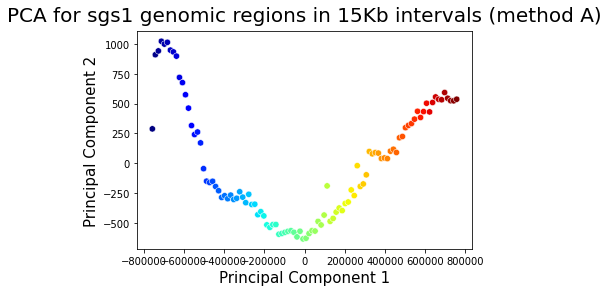

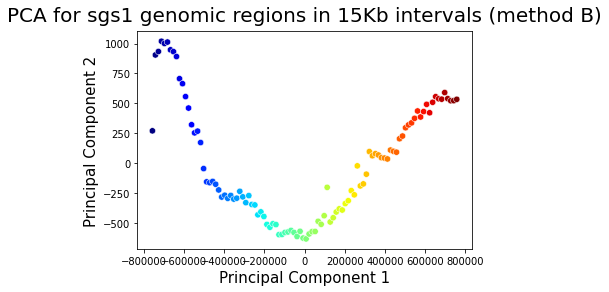

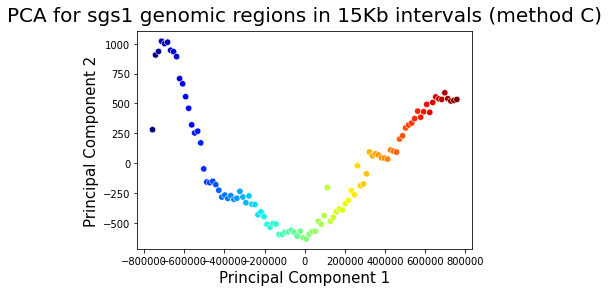

In [34]:
# METHOD A 
plt.figure()
cmap = plt.get_cmap('jet')
colors = list(cmap(np.linspace(0, 1, len(finalDf_A["bins"]))))
sns.scatterplot(x = "principal component 1", 
                y = "principal component 2",
                data = finalDf_A,
                palette = colors,
                s=40,
               hue = finalDf_A["bins"], legend = False)

#targets = list(finalDf_A["bins"]/1000)
#plt.legend(targets, bbox_to_anchor=(1, -0.15),ncol=11)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("PCA for sgs1 genomic regions in 15Kb intervals (method A)", fontsize = 20, pad = 10);



# METHOD B 
plt.figure()
cmap = plt.get_cmap('jet')
colors = list(cmap(np.linspace(0, 1, len(finalDf_B["bins"]))))
sns.scatterplot(x = "principal component 1", 
                y = "principal component 2",
                data = finalDf_B,
                palette = colors,
                s=40,
               hue = finalDf_B["bins"], legend = False)

#targets = list(finalDf_B["bins"]/1000)
#plt.legend(targets, bbox_to_anchor=(1, -0.15),ncol=11)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("PCA for sgs1 genomic regions in 15Kb intervals (method B)", fontsize = 20, pad = 10);



# METHOD C
plt.figure()
cmap = plt.get_cmap('jet')
colors = list(cmap(np.linspace(0, 1, len(finalDf_C["bins"]))))
sns.scatterplot(x = "principal component 1", 
                y = "principal component 2",
                data = finalDf_C,
                palette = colors,
                s=40,
               hue = finalDf_C["bins"], legend = False)

#targets = list(finalDf_C["bins"]/1000)
#plt.legend(targets, bbox_to_anchor=(1, -0.15),ncol=11)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("PCA for sgs1 genomic regions in 15Kb intervals (method C)", fontsize = 20, pad = 10);

### ON THE SAME PLOT

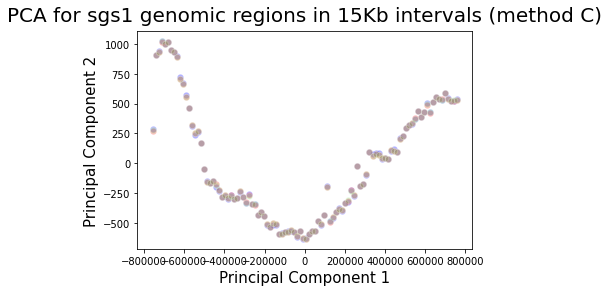

In [35]:
# METHOD A 
#plt.figure()
cmap = plt.get_cmap('jet')
colors = list(cmap(np.linspace(0, 1, len(finalDf_A["bins"]))))
sns.scatterplot(x = "principal component 1", 
                y = "principal component 2",
                data = finalDf_A,
                color = 'blue',
                s=40,
               legend = False, alpha = 0.3)

#targets = list(finalDf_A["bins"]/1000)
#plt.legend(targets, bbox_to_anchor=(1, -0.15),ncol=11)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("PCA for sgs1 genomic regions in 15Kb intervals (method A)", fontsize = 20, pad = 10);

# METHOD B 
#plt.figure()
cmap = plt.get_cmap('jet')
colors = list(cmap(np.linspace(0, 1, len(finalDf_B["bins"]))))
sns.scatterplot(x = "principal component 1", 
                y = "principal component 2",
                data = finalDf_B,
                color = 'red',
                s=40,
              legend = False, alpha = 0.3)

#targets = list(finalDf_B["bins"]/1000)
#plt.legend(targets, bbox_to_anchor=(1, -0.15),ncol=11)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("PCA for sgs1 genomic regions in 15Kb intervals (method B)", fontsize = 20, pad = 10);

# METHOD C
#plt.figure()
cmap = plt.get_cmap('jet')
colors = list(cmap(np.linspace(0, 1, len(finalDf_C["bins"]))))
sns.scatterplot(x = "principal component 1", 
                y = "principal component 2",
                data = finalDf_C,
                color = 'lightgreen',
                s=40,
               legend = False, alpha = 0.3)

#targets = list(finalDf_C["bins"]/1000)
#plt.legend(targets, bbox_to_anchor=(1, -0.15),ncol=11)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.title("PCA for sgs1 genomic regions in 15Kb intervals (method C)", fontsize = 20, pad = 10);